<a href="https://www.kaggle.com/code/iqbalhossain25/feature-scaling-standardscaler?scriptVersionId=229944020" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/social-network-ads/Social_Network_Ads.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

In [3]:
import kagglehub


# Download the latest version of the dataset
path = kagglehub.dataset_download("nani123456789/social-network-ads")
print("Path to dataset files:", path)

# Define the specific CSV file path
file_path = f"{path}/Social_Network_Ads.csv"  # Add the CSV file name to the directory path

# Load the CSV into a DataFrame
df = pd.read_csv(file_path)

# Check the DataFrame
print(df.head())

Path to dataset files: /kaggle/input/social-network-ads
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [4]:
df=df.iloc[:,2:]
df.sample(5)

,Age,EstimatedSalary,Purchased
358,40,71000,1
130,31,58000,0
204,58,101000,1
93,29,28000,0
192,29,43000,0


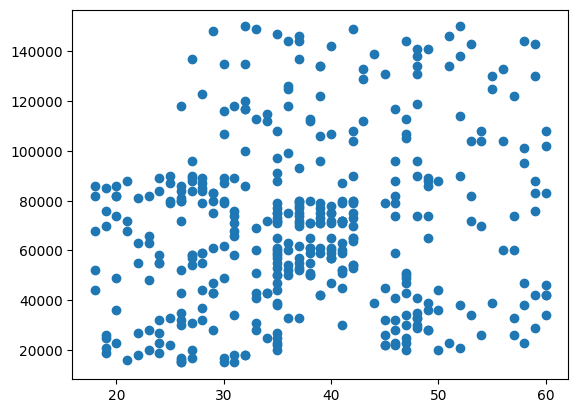

In [5]:
plt.scatter(df['Age'],df['EstimatedSalary'])

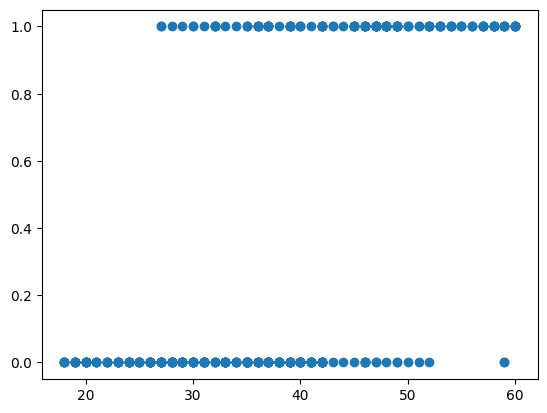

In [6]:
plt.scatter(df['Age'],df['Purchased'])

**Train test split **# 

In [7]:
X=df[['Age','EstimatedSalary']]
y=df['Purchased']

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

len(X_train)
X_train.shape,X_test.shape

((280, 2), (120, 2))

In [9]:
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [10]:
y_train

92     0
223    1
234    0
232    1
377    0
      ..
323    1
192    0
117    0
47     0
172    0
Name: Purchased, Length: 280, dtype: int64

# Feature_Tranfromation(freature_standardScaler) 

In [11]:

from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

# it is use for learn 
scaler.fit(X_train)

X_train_scaler=scaler.transform(X_train)
X_test_scaler=scaler.transform(X_test)

In [12]:
X_train_scaler[:5]

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654]])

In [13]:
# when we use StandardScaler its always return numpy array
# solution of this problems 
X_train_scaler=pd.DataFrame(X_train_scaler,columns=X_train.columns)
X_test_scaler=pd.DataFrame(X_test_scaler,columns=X_test.columns)

In [14]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [15]:
np.round(X_train_scaler.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


In [16]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

# What happerd when we use Scaling ??

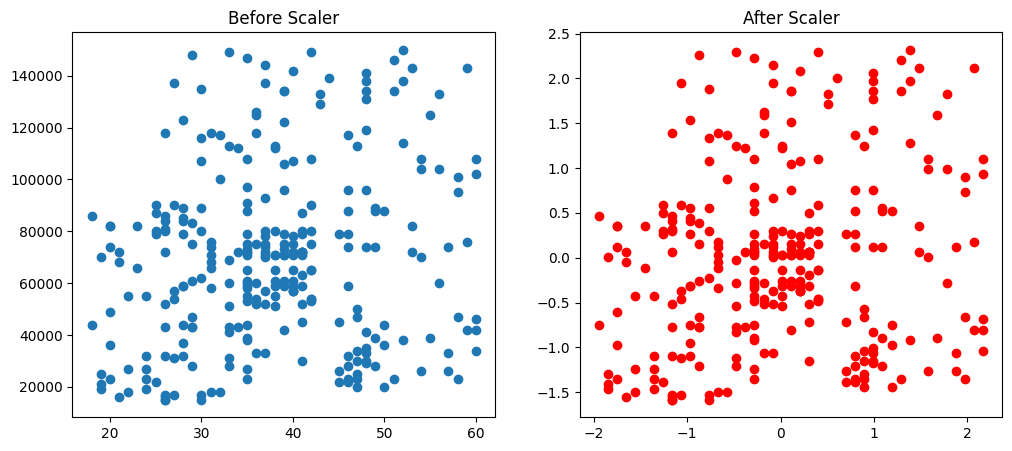

In [17]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title("Before Scaler")
 
ax2.scatter(X_train_scaler['Age'],X_train_scaler['EstimatedSalary'],color='red')
ax2.set_title("After Scaler")

plt.show()

# Use model to identify the real_life problem

Use Model test the real life progress

In [18]:
from sklearn.linear_model import LogisticRegression


In [19]:
lr=LogisticRegression()
lr_scaler=LogisticRegression()

In [20]:
lr.fit(X_train,y_train)
lr_scaler.fit(X_train_scaler,y_train)

LogisticRegression()

In [21]:
y_pred=lr.predict(X_test)
y_pred_scaler=lr_scaler.predict(X_test_scaler)

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaler))

Actual 0.6583333333333333
Scaled 0.8666666666666667


In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
tr=DecisionTreeClassifier()
tr_scaler=DecisionTreeClassifier()

In [26]:
tr.fit(X_train,y_train)
tr_scaler.fit(X_train_scaler,y_train)

DecisionTreeClassifier()

In [27]:
y_pred_tr=tr.predict(X_test)
y_pred_scaler_tr=lr_scaler.predict(X_test_scaler)

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
print("Actual",accuracy_score(y_test,y_pred_tr))
print("Scaled",accuracy_score(y_test,y_pred_scaler_tr))

Actual 0.875
Scaled 0.8666666666666667
